In [1]:
#https://github.com/BenningJustus/MachineLearning/blob/master/(1)Unigaussian.ipynb

In [1]:
# 전처리 관련 모듈

import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from numpy import quantile, where
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import missingno as msno

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
dataset = pd.read_csv("21y_삼성전자-광운대학교_1차_masked_data_3.csv")
dataset.head(5)

,DATETIME,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x391,x392,x393,x394,x395,x396,x397,x398,x399,x400
0,2019-07-01 00:00:00,0.388361,0.135838,0.125158,0.356172,0.268156,0.100000,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-07-01 01:00:00,0.386105,0.163776,0.175095,0.329176,0.340782,0.000000,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-01 02:00:00,0.370334,0.107900,0.112200,0.329176,0.212291,0.066667,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-07-01 03:00:00,0.374447,0.129094,0.105563,0.268199,0.212291,0.000000,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-07-01 04:00:00,0.378483,0.069364,0.085967,0.240052,0.368715,0.000000,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
coefficient_dataset = pd.read_csv("21y_삼성전자-광운대학교_1차_masked_input_3.csv")

In [4]:
coefficient = coefficient_dataset.fillna(0)
dataset_col = dataset.columns.drop('DATETIME')
dataset_re = dataset[dataset_col]

target_value = []
for i in range(dataset_re.shape[0]):
    
    target_value.append(((dataset_re.iloc[i])*(coefficient.iloc[0])).sum())
    
dataset['target'] = target_value

In [5]:
dataset

,DATETIME,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x392,x393,x394,x395,x396,x397,x398,x399,x400,target
0,2019-07-01 00:00:00,0.388361,0.135838,0.125158,0.356172,0.268156,0.100000,0.875,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.358059
1,2019-07-01 01:00:00,0.386105,0.163776,0.175095,0.329176,0.340782,0.000000,0.875,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.318522
2,2019-07-01 02:00:00,0.370334,0.107900,0.112200,0.329176,0.212291,0.066667,0.875,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.198174
3,2019-07-01 03:00:00,0.374447,0.129094,0.105563,0.268199,0.212291,0.000000,0.875,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.672584
4,2019-07-01 04:00:00,0.378483,0.069364,0.085967,0.240052,0.368715,0.000000,0.875,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.704031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15523,2021-04-07 19:00:00,0.893915,0.676301,0.638748,0.392197,0.469274,0.133333,1.000,0.0,0.0,...,0.805433,0.885686,0.785548,0.961285,0.0,0.0,0.0,0.0,0.0,21.010619
15524,2021-04-07 20:00:00,0.882925,0.676301,0.645702,0.392197,0.480447,0.066667,1.000,0.0,0.0,...,0.812247,0.886341,0.764569,0.942392,0.0,0.0,0.0,0.0,0.0,20.722235
15525,2021-04-07 21:00:00,0.899850,0.673410,0.645702,0.392197,0.469274,0.066667,1.000,0.0,0.0,...,0.813360,0.884048,0.778555,0.944245,0.0,0.0,0.0,0.0,0.0,20.661129
15526,2021-04-07 22:00:00,0.889085,0.673410,0.645702,0.392197,0.469274,0.066667,1.000,0.0,0.0,...,0.809605,0.902064,0.748252,0.950542,0.0,0.0,0.0,0.0,0.0,21.042554


In [6]:
dataset = dataset.fillna(0)
dataset.shape

(15528, 403)

In [7]:
dataset = dataset[dataset['DATETIME']>'2019-12-31 23:00:00'].reset_index(drop=True)

In [8]:
df_zero = dataset.replace(0, np.NaN)

# row가 모두 0인 feature list
feature_0 = list(set(df_zero.columns) - set(df_zero.dropna(how='all', axis=1).columns))

# row가 모두 0인 feature 삭제
dataset = dataset.drop(feature_0, axis=1)
df_zero = df_zero.drop(feature_0, axis=1)

print("삭제feature : ", feature_0)
print("삭제 후 : ", dataset.shape)

삭제feature :  ['x272', 'x249', 'x308', 'x257', 'x244', 'x361', 'x306', 'x240', 'x232', 'x322', 'x350', 'x283', 'x400', 'x384', 'x358', 'x387', 'x40', 'x31', 'x280', 'x7', 'x8', 'x22', 'x247', 'x386', 'x309']
삭제 후 :  (11112, 378)


In [9]:
df_zero = df_zero.dropna(thresh = 11000, axis=1) # 11000개 이상만 남기기
columns = df_zero.columns
dataset = dataset[columns]
dataset.shape

(11112, 296)

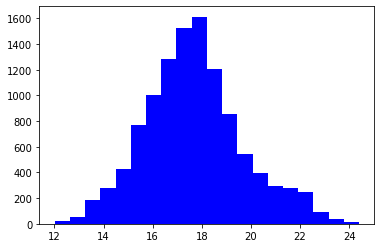

In [10]:
dataset["target"].hist(bins=20, grid=False, color='blue')
plt.show()

In [14]:
dataset["target"].idxmin()

7

In [15]:
dataset_copy = dataset.drop(index =7)
dataset_copy["target"].idxmin()

8

In [16]:
dataset_copy["target"].idxmax()

10959

In [17]:
dataset_copy = dataset.drop(index =10959)
dataset_copy["target"].idxmax()

10968

In [18]:
datatime = dataset["DATETIME"]
del dataset["DATETIME"]

In [19]:
dataset

,y,x1,x2,x3,x4,x9,x10,x11,x12,x13,...,x381,x382,x388,x390,x391,x392,x393,x394,x395,target
0,0.179553,0.298651,0.298357,0.330547,0.430168,0.294292,0.33750,0.460527,0.750000,0.093417,...,0.392857,0.634672,0.000000,0.775324,0.362091,0.767393,0.656362,0.548019,0.642474,13.789984
1,0.179183,0.323699,0.298357,0.240632,0.430168,0.299728,0.33750,0.429522,0.750000,0.117852,...,0.413690,0.636887,0.000000,0.776744,0.369314,0.771352,0.653396,0.550194,0.647276,13.589370
2,0.184602,0.317919,0.298357,0.330547,0.430168,0.266123,0.33750,0.429522,0.750000,0.082272,...,0.448810,0.639693,0.000000,0.778759,0.385522,0.769376,0.654746,0.548019,0.637724,14.015291
3,0.182959,0.272640,0.272756,0.240632,0.402235,0.249568,0.33750,0.419209,0.750000,0.083558,...,0.448810,0.636887,0.000607,0.781315,0.404729,0.764786,0.652956,0.550194,0.634782,13.657127
4,0.178988,0.273603,0.268331,0.240632,0.402235,0.236224,0.34375,0.410871,0.750000,0.083558,...,0.392857,0.639693,0.000826,0.782404,0.406585,0.761074,0.648089,0.537607,0.641455,12.997716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,0.893915,0.676301,0.638748,0.392197,0.469274,0.819867,0.76875,0.671511,0.583333,0.213139,...,0.500000,0.657072,0.909493,0.907319,0.611577,0.805433,0.885686,0.785548,0.961285,21.010619
11108,0.882925,0.676301,0.645702,0.392197,0.480447,0.852978,0.75625,0.675296,0.500000,0.164446,...,0.464286,0.657072,0.911246,0.906964,0.627517,0.812247,0.886341,0.764569,0.942392,20.722235
11109,0.899850,0.673410,0.645702,0.392197,0.469274,0.789474,0.76250,0.675296,0.500000,0.180720,...,0.464286,0.665606,0.904451,0.901825,0.621644,0.813360,0.884048,0.778555,0.944245,20.661129
11110,0.889085,0.673410,0.645702,0.392197,0.469274,0.854460,0.76250,0.675296,0.583333,0.180720,...,0.464286,0.640005,0.903356,0.900762,0.619966,0.809605,0.902064,0.748252,0.950542,21.042554


In [20]:
df_log = dataset.apply(lambda x: np.log(x+1))

In [21]:
# thresh = quantile(df_log["target"], .05)
# print(thresh)

In [22]:
min(df_log["target"]), max(df_log["target"])

(2.5657714734742183, 3.234955959782577)

In [23]:
thresh = np.percentile(sorted(df_log["target"]), 1)

In [24]:
df_log.loc[df_log["target"]<=thresh, 'class'] = '0' #이상
df_log.loc[df_log["target"]>thresh, 'class'] = '1' #정상

In [25]:
df_log

,y,x1,x2,x3,x4,x9,x10,x11,x12,x13,...,x382,x388,x390,x391,x392,x393,x394,x395,target,class
0,0.165135,0.261326,0.261099,0.285590,0.357792,0.257964,0.290802,0.378797,0.559616,0.089308,...,0.491442,0.000000,0.573983,0.309021,0.569505,0.504623,0.436976,0.496204,2.693950,1
1,0.164821,0.280430,0.261099,0.215621,0.357792,0.262155,0.290802,0.357340,0.559616,0.111409,...,0.492796,0.000000,0.574783,0.314310,0.571743,0.502832,0.438380,0.499123,2.680293,1
2,0.169407,0.276054,0.261099,0.285590,0.357792,0.235960,0.290802,0.357340,0.559616,0.079063,...,0.494509,0.000000,0.575916,0.326077,0.570627,0.503648,0.436976,0.493308,2.709069,1
3,0.168019,0.241093,0.241185,0.215621,0.338067,0.222798,0.290802,0.350100,0.559616,0.080250,...,0.492796,0.000607,0.577352,0.339845,0.568029,0.502565,0.438380,0.491509,2.684927,1
4,0.164656,0.241850,0.237702,0.215621,0.338067,0.212062,0.295464,0.344208,0.559616,0.080250,...,0.494509,0.000826,0.577963,0.341165,0.565924,0.499617,0.430227,0.495583,2.638894,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11107,0.638646,0.516589,0.493933,0.330883,0.384768,0.598763,0.570273,0.513728,0.459532,0.193211,...,0.505052,0.646838,0.645698,0.477213,0.590801,0.634292,0.579725,0.673600,3.091525,1
11108,0.632826,0.516589,0.498167,0.330883,0.392344,0.616794,0.563181,0.515990,0.405465,0.152246,...,0.505052,0.647756,0.645513,0.487055,0.594568,0.634639,0.567906,0.663920,3.078336,1
11109,0.641775,0.514864,0.498167,0.330883,0.384768,0.581922,0.566733,0.515990,0.405465,0.166125,...,0.510189,0.644194,0.642814,0.483441,0.595181,0.633423,0.575801,0.664874,3.075519,1
11110,0.636093,0.514864,0.498167,0.330883,0.384768,0.617594,0.566733,0.515990,0.459532,0.166125,...,0.494700,0.643618,0.642255,0.482405,0.593109,0.642939,0.558616,0.668107,3.092975,1


1 = normal, 0 = abnormal
1    11000
0      112
Name: class, dtype: int64


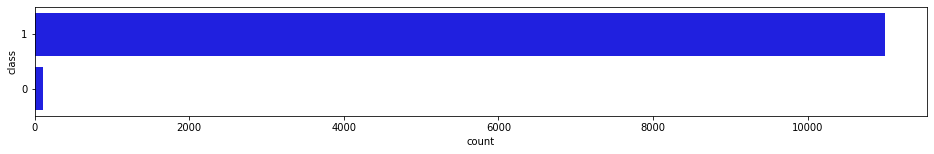

0.010181818181818183


In [26]:
# Plot the balance of class labels
normal = df_log['class']
df_base = df_log.copy()

print('1 = normal, 0 = abnormal')
value_counts = normal.value_counts()
print(value_counts)

plt.figure(figsize=(16,2))
fig = sns.countplot(y=normal, data=df_log, color='b')
plt.show()

contamination_rate = value_counts[1]/value_counts[0]
print(contamination_rate)

In [27]:
train_dataset = df_log['class'].isin(['1'])
train_dataset = df_log.loc[train_dataset]

test_dataset_normal = train_dataset.iloc[10888:]
train_dataset = train_dataset.iloc[:10888]

test_dataset = df_log['class'].isin(['0'])
test_dataset = df_log.loc[test_dataset]

test_dataset = pd.concat([test_dataset_normal, test_dataset])

train_dataset.shape, test_dataset.shape, test_dataset_normal.shape

((10888, 296), (224, 296), (112, 296))

In [28]:
test_data_index = test_dataset.reset_index()

In [29]:
test_data_index["target"].idxmin()

115

In [30]:
test_dataset_copy = test_data_index.drop(index =115)
test_dataset_copy["target"].idxmin()

116

In [31]:
test_dataset_copy["target"].idxmax()

78

In [32]:
test_dataset_copy = test_data_index.drop(index =78)
test_dataset_copy["target"].idxmax()

79

In [33]:
y_train = train_dataset["target"]
y__train = train_dataset["y"]
y_test = test_dataset["target"]
y__test = test_dataset['y']

train_class = train_dataset['class']
test_class = test_dataset['class']

del train_dataset["target"]
del test_dataset["target"]
del train_dataset['class']
del test_dataset['class']
del train_dataset['y']
del test_dataset['y']

In [34]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
X_scaled_train  = scaler.fit_transform(train_dataset)
X_scaled_test  = scaler.fit_transform(test_dataset)
y_scaled_train  = scaler.fit_transform(y_train)
y_scaled_test  = scaler.fit_transform(y_test)

In [36]:
import math 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score

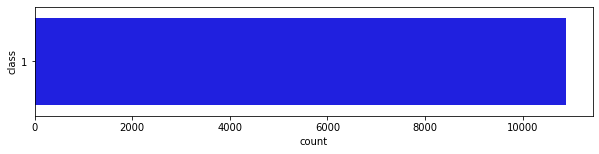

In [44]:
plt.figure(figsize=(10,2))
fig = sns.countplot(y=train_class, data=train_class, color='blue')
plt.show()

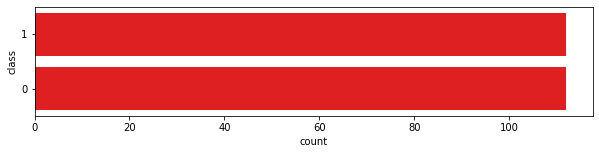

In [43]:
plt.figure(figsize=(10,2))
fig = sns.countplot(y=test_class, data=test_class, color='red')
plt.show()

In [39]:
test_class_copy.idxmin()

NameError: name 'test_class_copy' is not defined

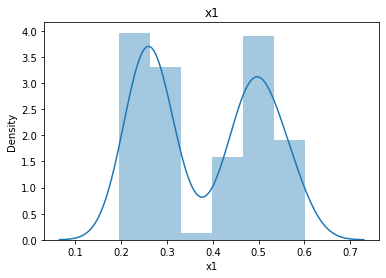

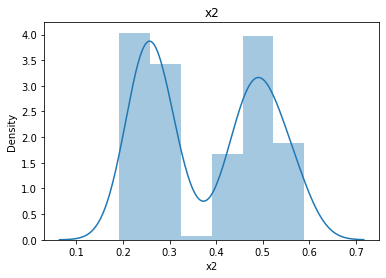

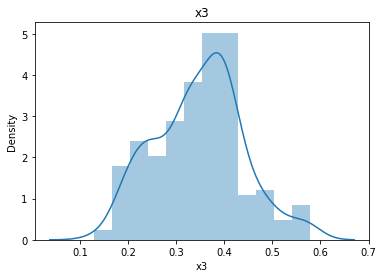

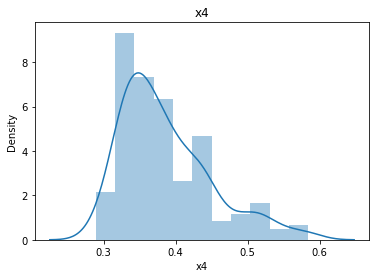

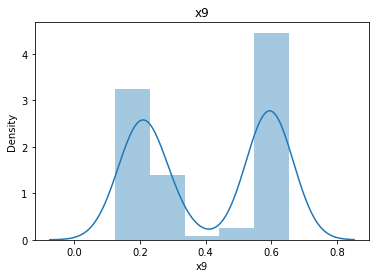

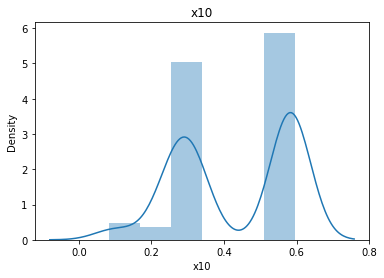

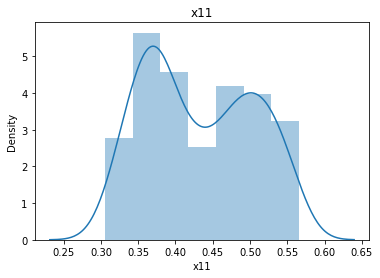

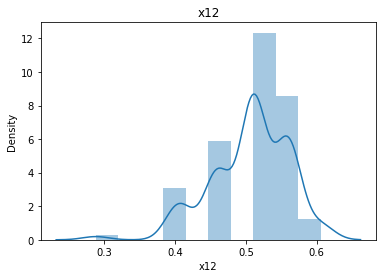

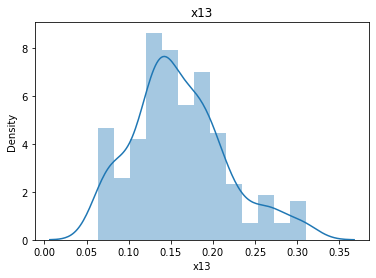

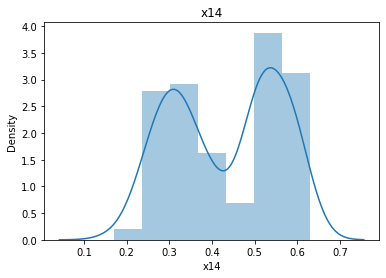

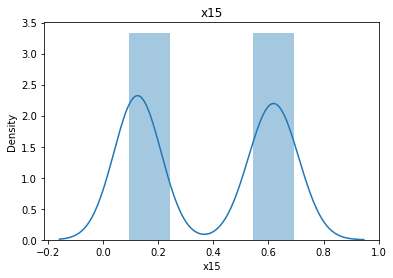

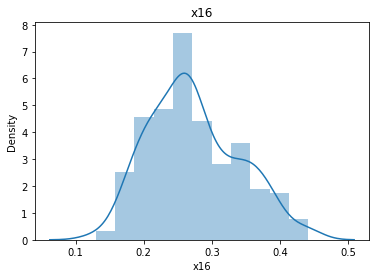

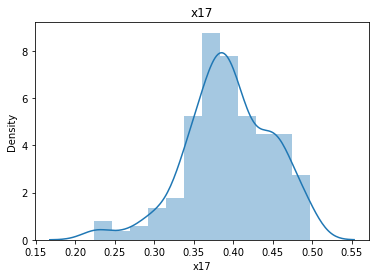

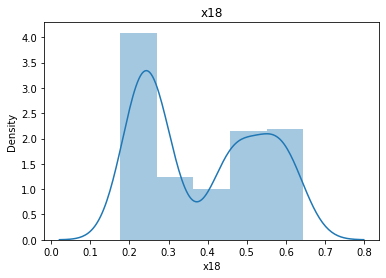

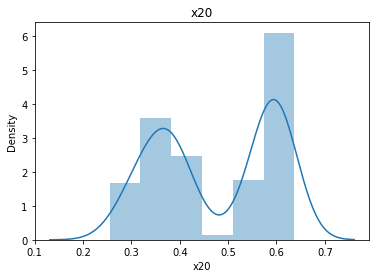

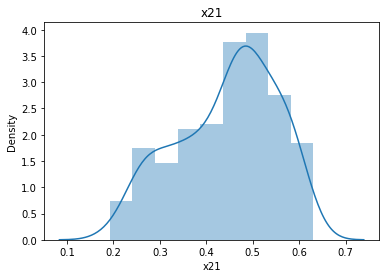

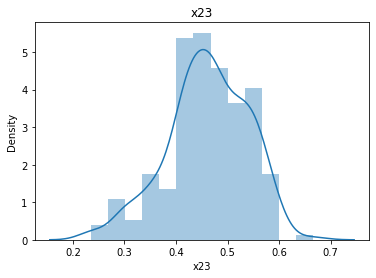

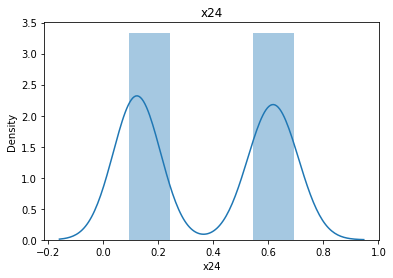

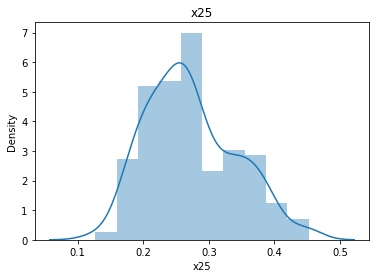

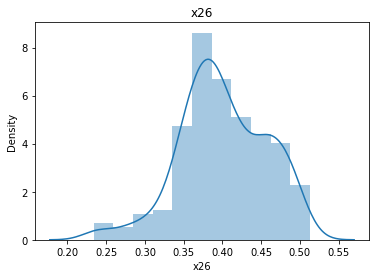

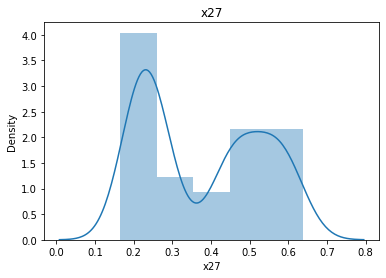

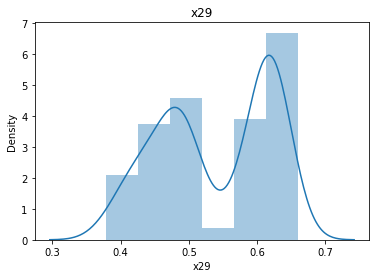

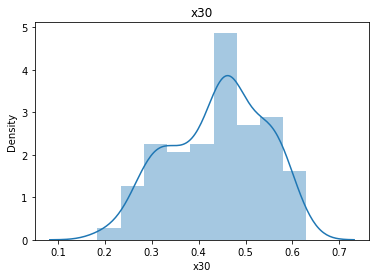

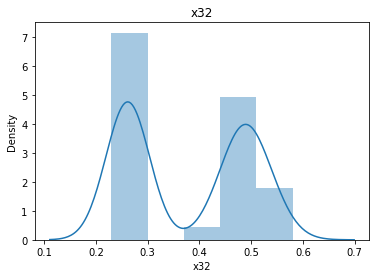

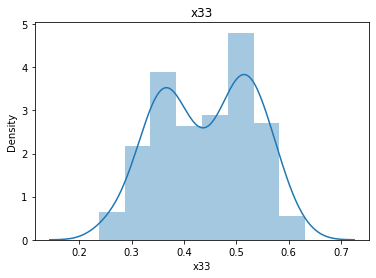

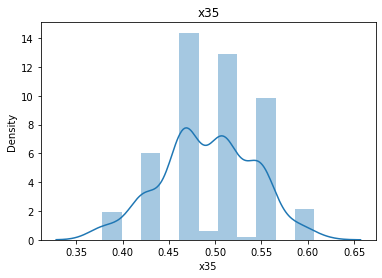

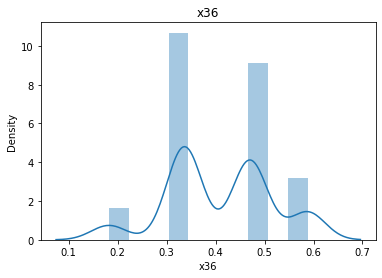

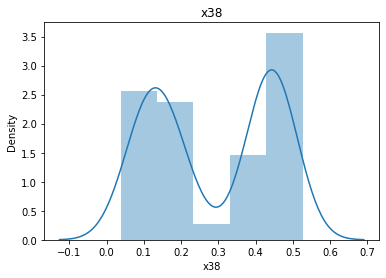

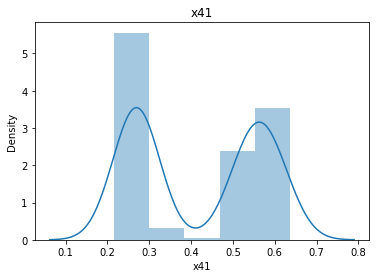

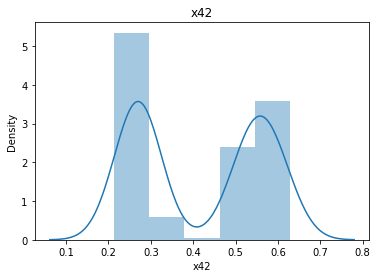

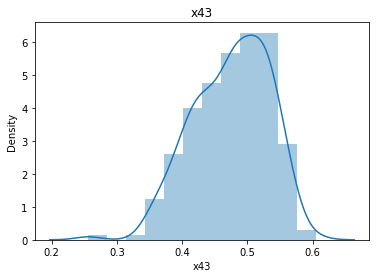

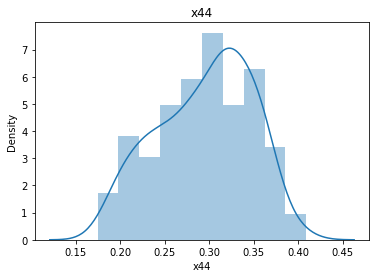

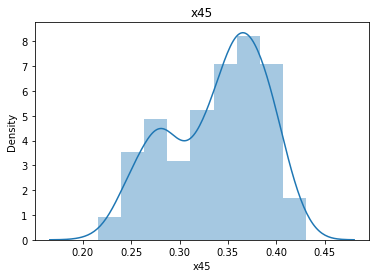

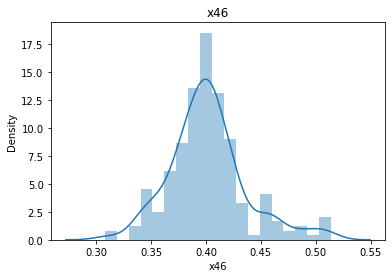

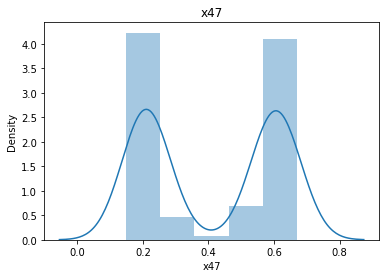

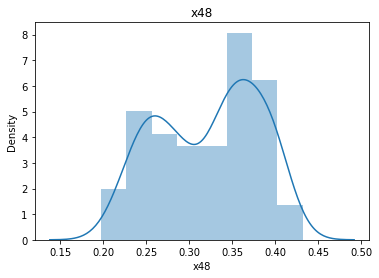

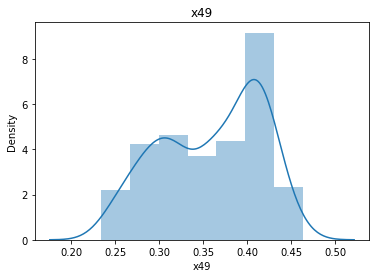

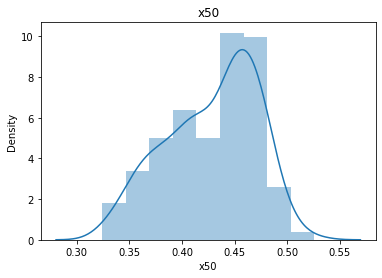

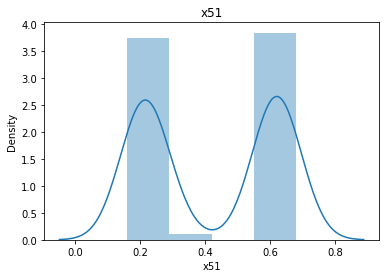

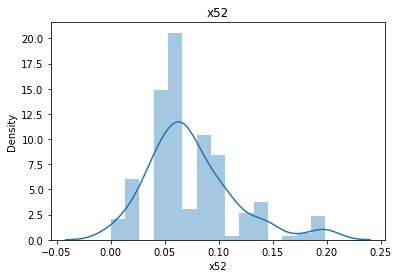

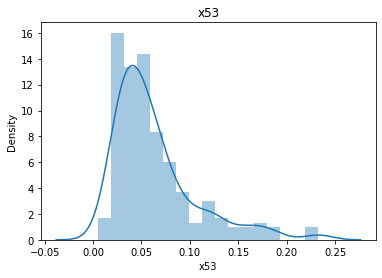

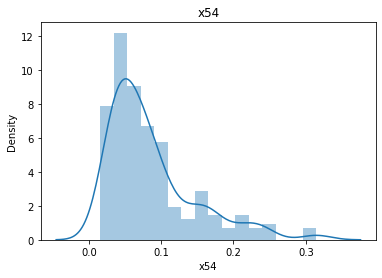

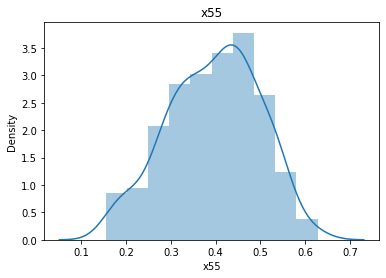

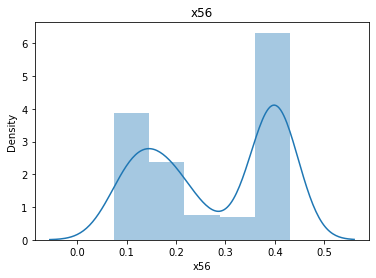

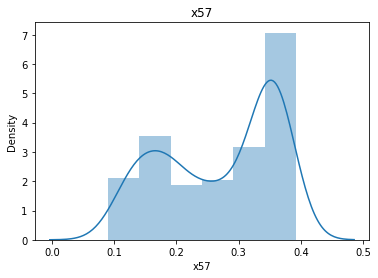

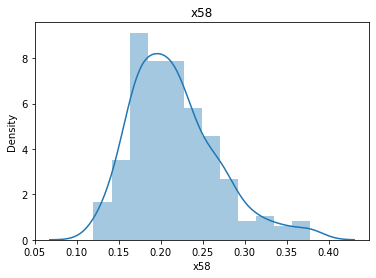

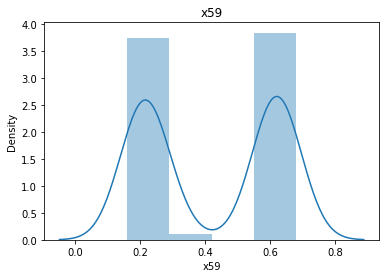

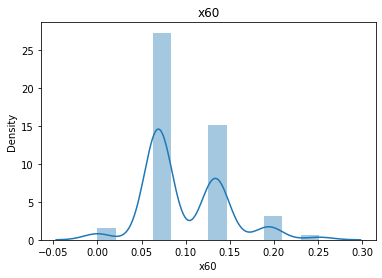

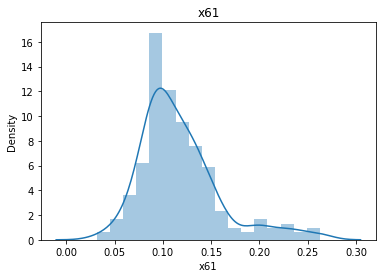

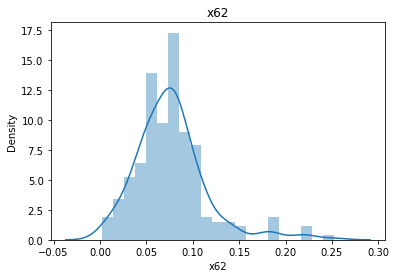

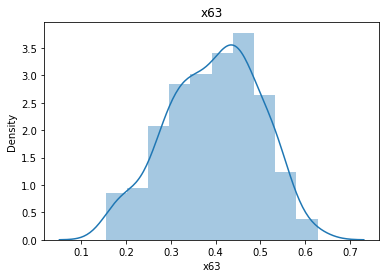

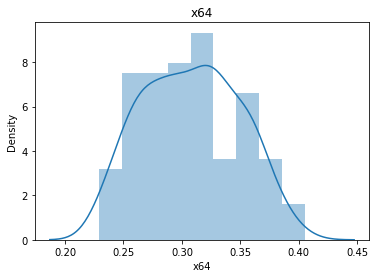

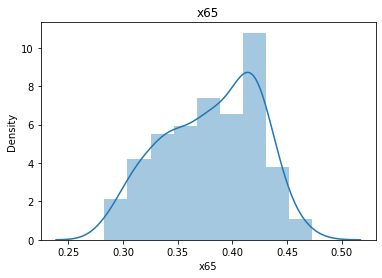

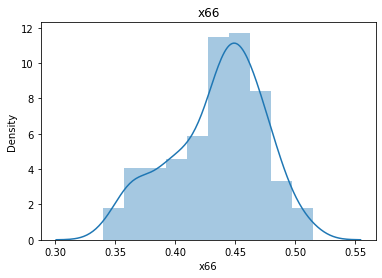

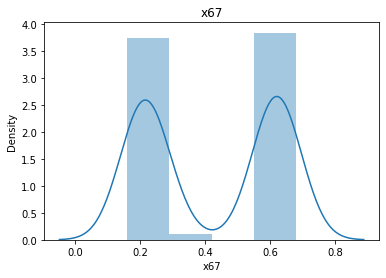

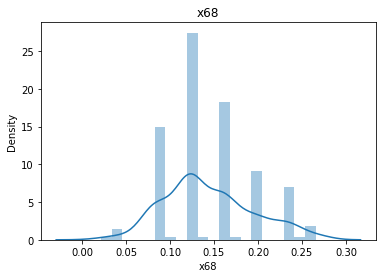

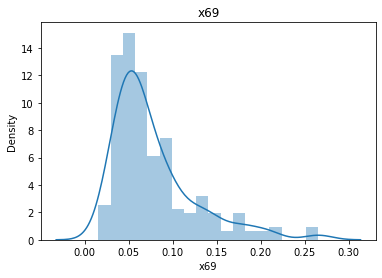

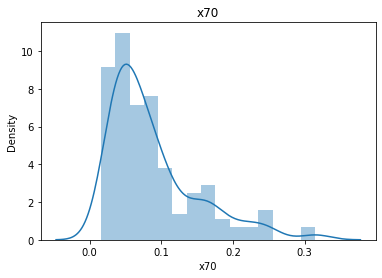

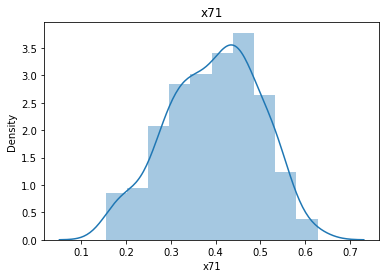

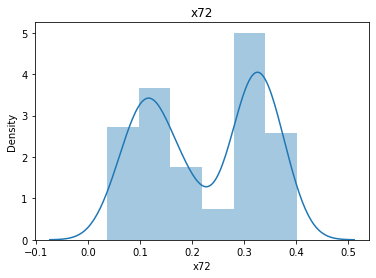

KeyboardInterrupt: 

In [40]:
#변수별 분포 확인

for col in test_dataset.columns:
    sns.distplot(test_dataset.loc[test_dataset[col].notnull(), col])
    plt.title(col)
    plt.show()

In [33]:
import time
from sklearn.manifold import TSNE

In [380]:
#임의의 index를 뽑고
X_tsne = train_dataset
y_tsne = y_train
X_tsne.shape, y_tsne.shape

((10888, 293), (10888,))

In [381]:
time_start = time.time()
tsne = TSNE(n_components=2, random_state=12)

In [382]:
tsne_results = tsne.fit_transform(X_tsne)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 78.28010535240173 seconds


In [383]:
y_tsne_reshape = y_tsne.values.reshape(-1,1)

In [384]:
y_tsne_scaled  = scaler.fit_transform(y_tsne_reshape)

In [385]:
y_tsne_scaled = np.squeeze(y_tsne_scaled)

In [386]:
tsne_df = pd.DataFrame({'X_tsne':tsne_results[:,0],
                        'y_tsne':tsne_results[:,1],
                        'target':y_tsne_scaled})
#tsne_df.head()

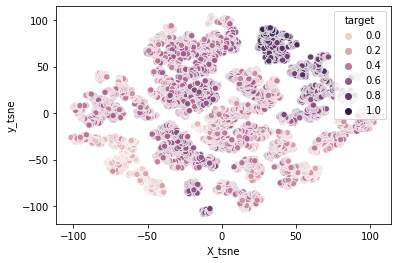

In [387]:
sns.scatterplot(x="X_tsne", y="y_tsne",hue="target",data=tsne_df);

In [350]:
from scipy import stats
z_score = stats.zscore(X_scaled_train, axis=1, ddof=1)
z_score

array([[ 0.05687492,  0.05554352,  0.0826353 , ...,  0.10610246,
         0.12623199, -0.9446467 ],
       [ 0.14645   ,  0.03302238, -0.37044496, ...,  0.05986185,
         0.11724632, -0.91501534],
       [ 0.09395734,  0.00771842,  0.03435342, ...,  0.04471946,
         0.07721503, -1.02680691],
       ...,
       [ 0.85504388,  0.85801147, -0.62325555, ...,  0.9060679 ,
         1.3491805 ,  1.96901775],
       [ 0.88176267,  0.88471751, -1.06100819, ...,  0.86283218,
         1.54325954,  1.99422937],
       [ 0.82756972,  0.83242759, -1.01706984, ...,  0.8973841 ,
         1.59709596,  2.07294911]])

In [355]:
from sklearn.decomposition import PCA
#z-score
pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled_train)

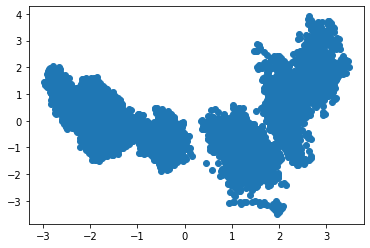

In [356]:
import matplotlib.pyplot as plt
plt.scatter(pc[:,0],pc[:,1])

In [376]:
y_reshape = y_train.values.reshape(-1,1)

In [377]:
y_reshape_scaled  = scaler.fit_transform(y_reshape)

In [378]:
y_reshape_scaled = np.squeeze(y_reshape_scaled)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

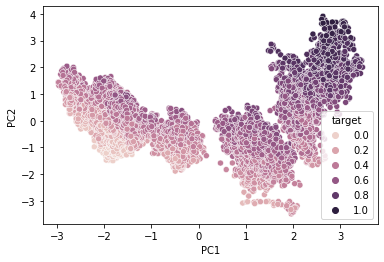

In [379]:
pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled_train)

pc_y = np.c_[pc,y_reshape_scaled]
df = pd.DataFrame(pc_y,columns=['PC1','PC2','target'])

import seaborn as sns
sns.scatterplot(data=df,x='PC1',y='PC2',hue='target')

In [367]:
train_class.shape

(10888,)

In [368]:
pc.shape

(10888, 2)

In [370]:
import pandas as pd
import numpy as np
pc_y = np.c_[pc,y_train]
df = pd.DataFrame(pc_y,columns=['PC1','PC2','Abnormal'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

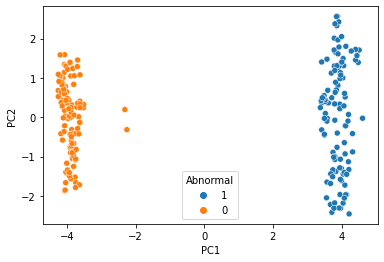

In [213]:
import seaborn as sns
sns.scatterplot(data=df,x='PC1',y='PC2',hue='Abnormal')

In [66]:
import statsmodels.graphics.tsaplots as sgt 

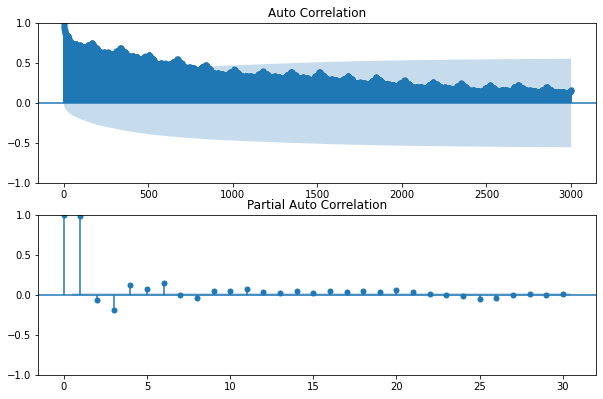

In [102]:
## Close

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)

sgt.plot_acf(dataset["target"], lags = 3000, ax=ax1)
ax1.set_title("Auto Correlation")


sgt.plot_pacf(dataset["target"], lags = 30, method = ('ols'), ax=ax2)
ax2.set_title("Partial Auto Correlation")

plt.show()